# CAPSTONE PROJECT - 2
##    
# Prediction Of Mental Health In Tech and Non-Tech Companies
##   

###  
## Importing Required Libraries
###  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('dark_background')

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

###  
## Reading CSV File (Dataset)
###  

In [3]:
df = pd.read_csv("C:/rishabh's space/IIIT BHAGALPUR M.TECH/Course Work Assignments and Various Files/SEM 2/Capstone Project 2/data.csv")
df.head()

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,I think opening up more conversation around th...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska


###  
## Data Cleaning
###  

###  
### Droping all columns except the selected features and the target attribute(value to be predicted)
###  

In [4]:
df.drop(df.columns.difference(['Is your employer primarily a tech company/organization?',	
                               'What is your age?',
                               'What is your gender?',
                               'Do you have a family history of mental illness?',
                               'Have you had a mental health disorder in the past?',
                               'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
                               'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
                               'Do you *currently* have a mental health disorder?']), 1, inplace=True)

C:\Users\risha\AppData\Local\Temp\ipykernel_12028\784728507.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['Is your employer primarily a tech company/organization?',


###  
### Displaying the modified data
###  

In [5]:
df.head()

,Is your employer primarily a tech company/organization?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Do you *currently* have a mental health disorder?,Have you had a mental health disorder in the past?,Do you have a family history of mental illness?,What is your age?,What is your gender?
0,True,Yes,Yes,Don't Know,No,No,25,Male
1,True,No,Yes,Possibly,Possibly,Yes,51,male
2,True,No,I don't know,No,No,I don't know,27,Male
3,True,Yes,Yes,No,No,Yes,37,male
4,True,I don't know,I don't know,No,No,No,46,m


###  
### Show the number of rows and columns in the dataset after modification
###  

In [6]:
df.shape

(352, 8)

###  
### Display info about the modified data
###  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 8 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                  --------------  ----- 
 0   Is your employer primarily a tech company/organization?                                                                                 304 non-null    object
 1   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  304 non-null    object
 2   Does your employer offer resources to learn more about mental health disorders and options for seeking help?                            304 non-null    object
 3   Do you *currently* have a mental health disorder?                      

###  
### Calculate the number of NA values in each column of the data
###  

In [8]:
df.isna().sum()

Is your employer primarily a tech company/organization?                                                                                   48
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?    48
Does your employer offer resources to learn more about mental health disorders and options for seeking help?                              48
Do you *currently* have a mental health disorder?                                                                                          0
Have you had a mental health disorder in the past?                                                                                         3
Do you have a family history of mental illness?                                                                                            0
What is your age?                                                                                                                          0
What is your 

###  
### Now we will eliminate NA values from the data for each column
###  

###  
### Finding distinct values for the each column
###  

In [9]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Is your employer primarily a tech company/organization?': 3,
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 4,
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 4,
 'Do you *currently* have a mental health disorder?': 4,
 'Have you had a mental health disorder in the past?': 5,
 'Do you have a family history of mental illness?': 3,
 'What is your gender?': 43}

In [10]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Is your employer primarily a tech company/organization?': [True, nan, False],
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': ['Yes',
  'No',
  "I don't know",
  nan],
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': ['Yes',
  "I don't know",
  'No',
  nan],
 'Do you *currently* have a mental health disorder?': ["Don't Know",
  'Possibly',
  'No',
  'Yes'],
 'Have you had a mental health disorder in the past?': ['No',
  'Possibly',
  'Yes',
  "Don't Know",
  nan],
 'Do you have a family history of mental illness?': ['No',
  'Yes',
  "I don't know"],
 'What is your gender?': ['Male',
  'male',
  'm',
  'female',
  'Female',
  nan,
  'M',
  'F',
  'f',
  'Let\'s keep it simple and say "male"',
  'Non-binary',
  'Identify as male',
  'Male ',
  'Woman',
  'Non binary',
  'Masculine',
  'Cishet male',
  'None',
  'Female-identified',
 

###  
### Finding the most recurrent value for the considered column
###  

In [11]:
df['Is your employer primarily a tech company/organization?'].mode()

0    True
Name: Is your employer primarily a tech company/organization?, dtype: object

###  
### Replacing NA values with 'True' as it's most recurrent 
###  

In [12]:
df['Is your employer primarily a tech company/organization?'] = df['Is your employer primarily a tech company/organization?'].fillna(True)

###  
### Checking if the NA values have been replaced
###  

In [13]:
df.isna().sum()

Is your employer primarily a tech company/organization?                                                                                    0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?    48
Does your employer offer resources to learn more about mental health disorders and options for seeking help?                              48
Do you *currently* have a mental health disorder?                                                                                          0
Have you had a mental health disorder in the past?                                                                                         3
Do you have a family history of mental illness?                                                                                            0
What is your age?                                                                                                                          0
What is your 

###  
### Now moving on to the next column
###  

###  
### Replacing NA values with 'I don't know'
###  

In [14]:
df['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'] = df['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].fillna("I don't know")

###  
### Checking if the NA values have been replaced
###  

In [15]:
df.isna().sum()

Is your employer primarily a tech company/organization?                                                                                    0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?     0
Does your employer offer resources to learn more about mental health disorders and options for seeking help?                              48
Do you *currently* have a mental health disorder?                                                                                          0
Have you had a mental health disorder in the past?                                                                                         3
Do you have a family history of mental illness?                                                                                            0
What is your age?                                                                                                                          0
What is your 

###  
### Now we will Eliminate NA values for gender column
###  

###  
### Checking the most recurrent value for the column
###  

In [16]:
df['What is your gender?'].mode()

0    Male
Name: What is your gender?, dtype: object

###  
### Replacing NA values with 'Male'
###  

In [17]:
df['What is your gender?'] = df['What is your gender?'].fillna('Male')

###  
### Checking if the NA values have been replaced
###  

In [18]:
df.isna().sum()

Is your employer primarily a tech company/organization?                                                                                    0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?     0
Does your employer offer resources to learn more about mental health disorders and options for seeking help?                              48
Do you *currently* have a mental health disorder?                                                                                          0
Have you had a mental health disorder in the past?                                                                                         3
Do you have a family history of mental illness?                                                                                            0
What is your age?                                                                                                                          0
What is your 

###  
### Now we will Eliminate NA values from the column 'Have you had a mental health disorder in the past?'
###  

###  
### Finding the most recurrent value for the the column
###  

In [19]:
df['Have you had a mental health disorder in the past?'].mode()

0    Yes
Name: Have you had a mental health disorder in the past?, dtype: object

###  
### Replacing NA values with 'Yes' 
###  

In [20]:
df['Have you had a mental health disorder in the past?'] = df['Have you had a mental health disorder in the past?'].fillna('Yes')

###  
### Checking if the NA values have been replaced
###  

In [21]:
df.isna().sum()

Is your employer primarily a tech company/organization?                                                                                    0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?     0
Does your employer offer resources to learn more about mental health disorders and options for seeking help?                              48
Do you *currently* have a mental health disorder?                                                                                          0
Have you had a mental health disorder in the past?                                                                                         0
Do you have a family history of mental illness?                                                                                            0
What is your age?                                                                                                                          0
What is your 

###  
### Now we will eliminate NA values for the column 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?'
###  

###  
### Replacing NA values in the column with 'I don't know'
###  

In [22]:
df['Does your employer offer resources to learn more about mental health disorders and options for seeking help?'] = df['Does your employer offer resources to learn more about mental health disorders and options for seeking help?'].fillna("I don't know")

###  
### Checking if the NA values have been replaced
###  

In [23]:
df.isna().sum()

Is your employer primarily a tech company/organization?                                                                                   0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?    0
Does your employer offer resources to learn more about mental health disorders and options for seeking help?                              0
Do you *currently* have a mental health disorder?                                                                                         0
Have you had a mental health disorder in the past?                                                                                        0
Do you have a family history of mental illness?                                                                                           0
What is your age?                                                                                                                         0
What is your gender?

###  
### All NA values have been eliminated now
###  

###  
### Now we will reduce the number of possible values for the column 'What is your gender?'
### We will allow only 3 inputs namely 'Male', 'Female' and 'Other'
###  

###  
### Replacing 'Male' with 1, 'Female' with 0, 'Other' with 2
###  

In [24]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [25]:
df['What is your gender?'] = df['What is your gender?'].apply(encode_gender)

###  
### Checking disttinct values for object type attributes
###  

In [26]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': ['Yes',
  'No',
  "I don't know"],
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': ['Yes',
  "I don't know",
  'No'],
 'Do you *currently* have a mental health disorder?': ["Don't Know",
  'Possibly',
  'No',
  'Yes'],
 'Have you had a mental health disorder in the past?': ['No',
  'Possibly',
  'Yes',
  "Don't Know"],
 'Do you have a family history of mental illness?': ['No',
  'Yes',
  "I don't know"]}

###  
### Checking the status of the dataset
###  

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 8 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                  --------------  ----- 
 0   Is your employer primarily a tech company/organization?                                                                                 352 non-null    bool  
 1   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  352 non-null    object
 2   Does your employer offer resources to learn more about mental health disorders and options for seeking help?                            352 non-null    object
 3   Do you *currently* have a mental health disorder?                      

###  
### Reducing the object values to integer values for the column 'Do you *currently* have a mental health disorder?'
###  

In [28]:
def encode_target(x):
    if x == 'No':
        return 0
    elif x == 'Yes':
        return 1
    elif x =="Don't Know":
        return 0
    elif x =='Possibly':
        return 1

In [29]:
df['Do you *currently* have a mental health disorder?'] = df['Do you *currently* have a mental health disorder?'].apply(encode_target)

###  
### Checking the status of the dataset
###  

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 8 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                  --------------  ----- 
 0   Is your employer primarily a tech company/organization?                                                                                 352 non-null    bool  
 1   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  352 non-null    object
 2   Does your employer offer resources to learn more about mental health disorders and options for seeking help?                            352 non-null    object
 3   Do you *currently* have a mental health disorder?                      

###  
### Reducing Bool values to integer values for the column  'Is your employer primarily a tech company/organization?'
###  

In [31]:
def encode_tech_comp(x):
    if x == True:
        return 1
    else: 
        return 0

In [32]:
df['Is your employer primarily a tech company/organization?'] = df['Is your employer primarily a tech company/organization?'].apply(encode_tech_comp)

###  
### Rechecking the status of the data
###  

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 8 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                  --------------  ----- 
 0   Is your employer primarily a tech company/organization?                                                                                 352 non-null    int64 
 1   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  352 non-null    object
 2   Does your employer offer resources to learn more about mental health disorders and options for seeking help?                            352 non-null    object
 3   Do you *currently* have a mental health disorder?                      

###  
### Reducing object values to integer values for the rest of the columns
###  

In [34]:
ordinal_features = [
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
    'Have you had a mental health disorder in the past?',
    'Do you have a family history of mental illness?'
]

ordinal_orderings = [
    ['Yes','No',"I don't know"],
    ['Yes',"I don't know",'No'],
    ['No','Possibly','Yes',"Don't Know"],
    ['No','Yes',"I don't know"]
]

In [35]:
def ordinal_encode(data, columns, orderings):
    data = data.copy()
    for column, ordering in zip(columns, orderings):
        data[column] = data[column].apply(lambda x: ordering.index(x))
    return data

In [36]:
df = ordinal_encode(
    df,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

###  
### Rechecking the status of the data
###  

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 8 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype
---  ------                                                                                                                                  --------------  -----
 0   Is your employer primarily a tech company/organization?                                                                                 352 non-null    int64
 1   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  352 non-null    int64
 2   Does your employer offer resources to learn more about mental health disorders and options for seeking help?                            352 non-null    int64
 3   Do you *currently* have a mental health disorder?                           

###  
### Now all columns have integer type values with no null values
###  

###  
## Model Building
###  

In [38]:
x = df.drop(['Do you *currently* have a mental health disorder?'], axis = 1)
y = df['Do you *currently* have a mental health disorder?'].astype(int)

###  
### Splitting the dataset into train:70% and test:30%
###  

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0 , test_size = 0.3)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

###  
### List to hold the values to be printed
###  

In [41]:
accuracy_comp = []

In [42]:
precision_comp = []

In [43]:
recall_comp = []

In [44]:
f1score_comp = []

###  
## Logistic Regression
###  

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[26 13]
 [ 6 61]]

Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.67      0.73        39
           1       0.82      0.91      0.87        67

    accuracy                           0.82       106
   macro avg       0.82      0.79      0.80       106
weighted avg       0.82      0.82      0.82       106


Accuracy= 82.08%


###  
## Decision Tree Classifier
###  

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[26 13]
 [13 54]]

Classification Report:

               precision    recall  f1-score   support

           0       0.67      0.67      0.67        39
           1       0.81      0.81      0.81        67

    accuracy                           0.75       106
   macro avg       0.74      0.74      0.74       106
weighted avg       0.75      0.75      0.75       106


Accuracy= 75.47%


###  
## Random Forest Classifier
###  

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[24 15]
 [ 8 59]]

Classification Report:

               precision    recall  f1-score   support

           0       0.75      0.62      0.68        39
           1       0.80      0.88      0.84        67

    accuracy                           0.78       106
   macro avg       0.77      0.75      0.76       106
weighted avg       0.78      0.78      0.78       106


Accuracy= 78.3%


###  
## XGBoost
###  

In [48]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
acc = accuracy_score(y_test, predictions)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[24 15]
 [ 8 59]]

Classification Report:

               precision    recall  f1-score   support

           0       0.75      0.62      0.68        39
           1       0.80      0.88      0.84        67

    accuracy                           0.78       106
   macro avg       0.77      0.75      0.76       106
weighted avg       0.78      0.78      0.78       106


Accuracy= 78.3%


###  
## KNN
###  

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[20 19]
 [ 7 60]]

Classification Report:

               precision    recall  f1-score   support

           0       0.74      0.51      0.61        39
           1       0.76      0.90      0.82        67

    accuracy                           0.75       106
   macro avg       0.75      0.70      0.71       106
weighted avg       0.75      0.75      0.74       106


Accuracy= 75.47%


###  
## SVM
###  

In [50]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[29 10]
 [ 7 60]]

Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.74      0.77        39
           1       0.86      0.90      0.88        67

    accuracy                           0.84       106
   macro avg       0.83      0.82      0.82       106
weighted avg       0.84      0.84      0.84       106


Accuracy= 83.96%


###  
## Naive Bayes - Gaussian
###  

In [51]:
from sklearn.naive_bayes import GaussianNB
nbb = GaussianNB()
nbb.fit(x_train, y_train)
predictions = nbb.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[28 11]
 [ 5 62]]

Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.72      0.78        39
           1       0.85      0.93      0.89        67

    accuracy                           0.85       106
   macro avg       0.85      0.82      0.83       106
weighted avg       0.85      0.85      0.85       106


Accuracy= 84.91%


###  
## Naive Bayes - Bernoulli
###  

In [52]:
from sklearn.naive_bayes import BernoulliNB
nbb = BernoulliNB()
nbb.fit(x_train, y_train)
predictions = nbb.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[26 13]
 [ 4 63]]

Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.67      0.75        39
           1       0.83      0.94      0.88        67

    accuracy                           0.84       106
   macro avg       0.85      0.80      0.82       106
weighted avg       0.84      0.84      0.83       106


Accuracy= 83.96%


###  
## RESULTS
###  

Text(0.5, 1.0, 'Comparison Of Accuracy of the used ML models')

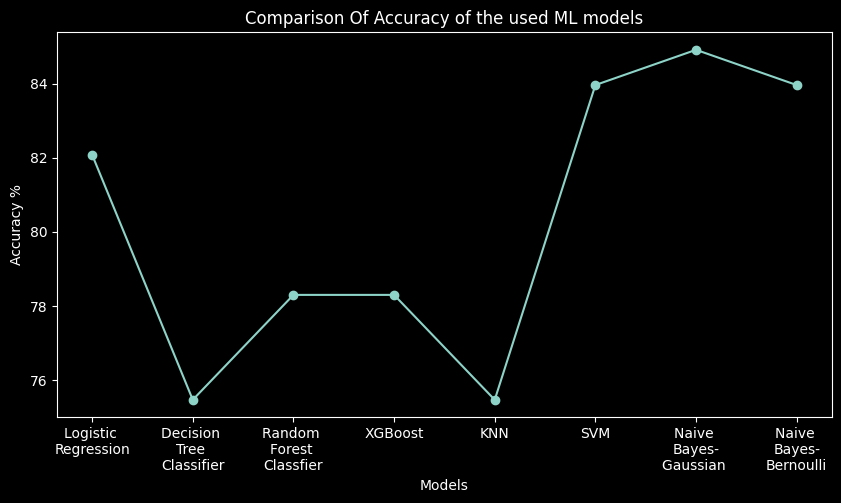

In [53]:
plt.figure(figsize=(10,5))
plt.plot(['Logistic \nRegression','Decision \nTree \nClassifier','Random \nForest \nClassfier',
         'XGBoost','KNN','SVM','Naive \nBayes-\nGaussian ','Naive \nBayes-\nBernoulli'],accuracy_comp, 'o-')
plt.xlabel("Models")
plt.ylabel("Accuracy %")
plt.title("Comparison Of Accuracy of the used ML models")

In [54]:
models= ['Logistic Regression','Decision Tree Classifier','Random Forest Classfier',
         'XGBoost','KNN','SVM','Naive Bayes-Gaussian ','Naive Bayes-Bernoulli']
print('Accuracies of models are:\n')
for i in range(8) :
        print(models[i],':',str(accuracy_comp[i])+'%')

Accuracies of models are:

Logistic Regression : 82.08%
Decision Tree Classifier : 75.47%
Random Forest Classfier : 78.3%
XGBoost : 78.3%
KNN : 75.47%
SVM : 83.96%
Naive Bayes-Gaussian  : 84.91%
Naive Bayes-Bernoulli : 83.96%


Text(0.5, 1.0, 'Comparison Of Precision of the used ML models')

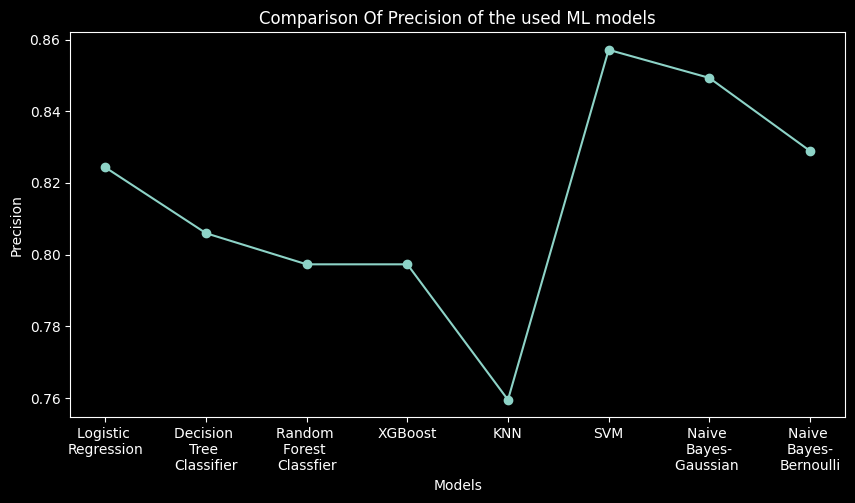

In [55]:
plt.figure(figsize=(10,5))
plt.plot(['Logistic \nRegression','Decision \nTree \nClassifier','Random \nForest \nClassfier',
         'XGBoost','KNN','SVM','Naive \nBayes-\nGaussian ','Naive \nBayes-\nBernoulli'],precision_comp, 'o-')
plt.xlabel("Models")
plt.ylabel("Precision")
plt.title("Comparison Of Precision of the used ML models")

In [56]:
models= ['Logistic Regression','Decision Tree Classifier','Random Forest Classfier',
         'XGBoost','KNN','SVM','Naive Bayes-Gaussian ','Naive Bayes-Bernoulli']
print('Precision of models are:\n')
for i in range(8) :
        print(models[i],':',str(precision_comp[i]))

Precision of models are:

Logistic Regression : 0.8243243243243243
Decision Tree Classifier : 0.8059701492537313
Random Forest Classfier : 0.7972972972972973
XGBoost : 0.7972972972972973
KNN : 0.759493670886076
SVM : 0.8571428571428571
Naive Bayes-Gaussian  : 0.8493150684931506
Naive Bayes-Bernoulli : 0.8289473684210527


Text(0.5, 1.0, 'Comparison Of Recall of the used ML models')

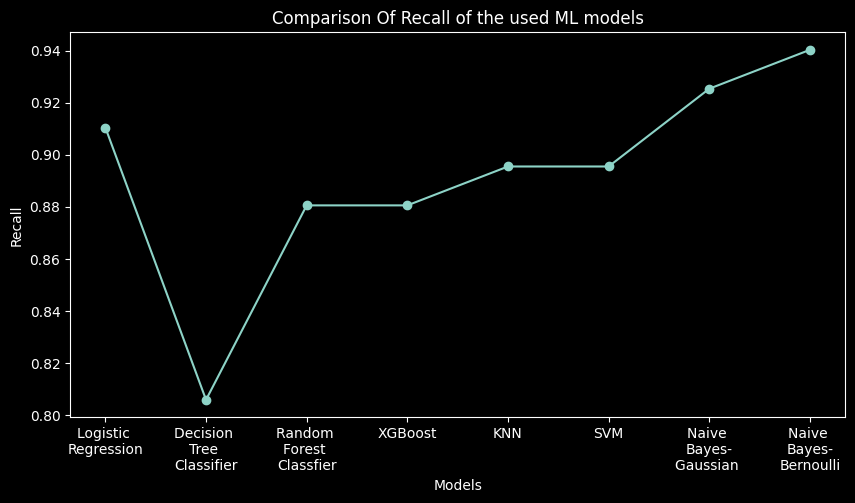

In [57]:
plt.figure(figsize=(10,5))
plt.plot(['Logistic \nRegression','Decision \nTree \nClassifier','Random \nForest \nClassfier',
         'XGBoost','KNN','SVM','Naive \nBayes-\nGaussian ','Naive \nBayes-\nBernoulli'],recall_comp, 'o-')
plt.xlabel("Models")
plt.ylabel("Recall")
plt.title("Comparison Of Recall of the used ML models")

In [58]:
models= ['Logistic Regression','Decision Tree Classifier','Random Forest Classfier',
         'XGBoost','KNN','SVM','Naive Bayes-Gaussian ','Naive Bayes-Bernoulli']
print('Recall of models are:\n')
for i in range(8) :
        print(models[i],':',str(recall_comp[i]))

Recall of models are:

Logistic Regression : 0.9104477611940298
Decision Tree Classifier : 0.8059701492537313
Random Forest Classfier : 0.8805970149253731
XGBoost : 0.8805970149253731
KNN : 0.8955223880597015
SVM : 0.8955223880597015
Naive Bayes-Gaussian  : 0.9253731343283582
Naive Bayes-Bernoulli : 0.9402985074626866


Text(0.5, 1.0, 'Comparison Of F1-Score of the used ML models')

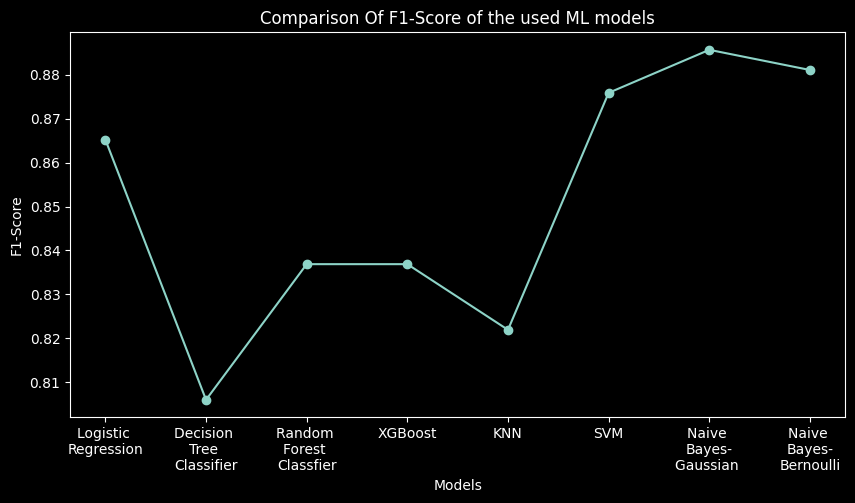

In [59]:
plt.figure(figsize=(10,5))
plt.plot(['Logistic \nRegression','Decision \nTree \nClassifier','Random \nForest \nClassfier',
         'XGBoost','KNN','SVM','Naive \nBayes-\nGaussian ','Naive \nBayes-\nBernoulli'],f1score_comp, 'o-')
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.title("Comparison Of F1-Score of the used ML models")

In [60]:
models= ['Logistic Regression','Decision Tree Classifier','Random Forest Classfier',
         'XGBoost','KNN','SVM','Naive Bayes-Gaussian ','Naive Bayes-Bernoulli']
print('F1-Score of models are:\n')
for i in range(8) :
        print(models[i],':',str(f1score_comp[i]))

F1-Score of models are:

Logistic Regression : 0.8652482269503546
Decision Tree Classifier : 0.8059701492537313
Random Forest Classfier : 0.8368794326241135
XGBoost : 0.8368794326241135
KNN : 0.8219178082191781
SVM : 0.8759124087591241
Naive Bayes-Gaussian  : 0.8857142857142857
Naive Bayes-Bernoulli : 0.8811188811188811


## 
# END OF PROJECT
## 